In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
i = Input(shape = x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i, x)

In [4]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 33s 8ms/step - loss: 0.3216 - accuracy: 0.8976 - val_loss: 0.1411 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1050 - accuracy: 0.9679 - val_loss: 0.0828 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0545 - accuracy: 0.9838 - val_loss: 0.0552 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.0490 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0467 - val_a

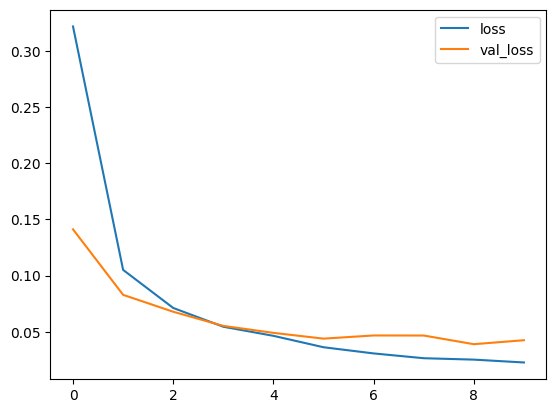

In [5]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

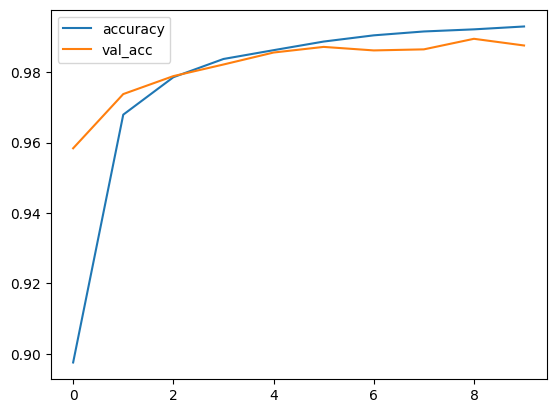

In [6]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(x_test, y_test))
print(model.summary())

313/313 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9876
[0.04246743023395538, 0.9876000285148621]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
None
